# Jupyter Notebook to develop a Model for accurate prediction of Diabetes through Machine Learning Algorithms

## In our analysis, we will use three Machine Learning Algorithms: Logistic Regression, Naive Bayes and Support Vector


In [1]:
#Importing important modules and library to perform our Data Analysis and Machine Learning Algorithms 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the Dataset onto a Pandas Dataframe

dataset = pd.read_csv(r'C:\Users\My PC\Desktop\Medical\liver.csv')

## Pre-Emtpive Data Analysis

In [3]:
#The Data will be pre-emptively analyzed to make the best out of it and help us understand the best fit for the algorithms

In [4]:
dataset.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [5]:
dataset.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


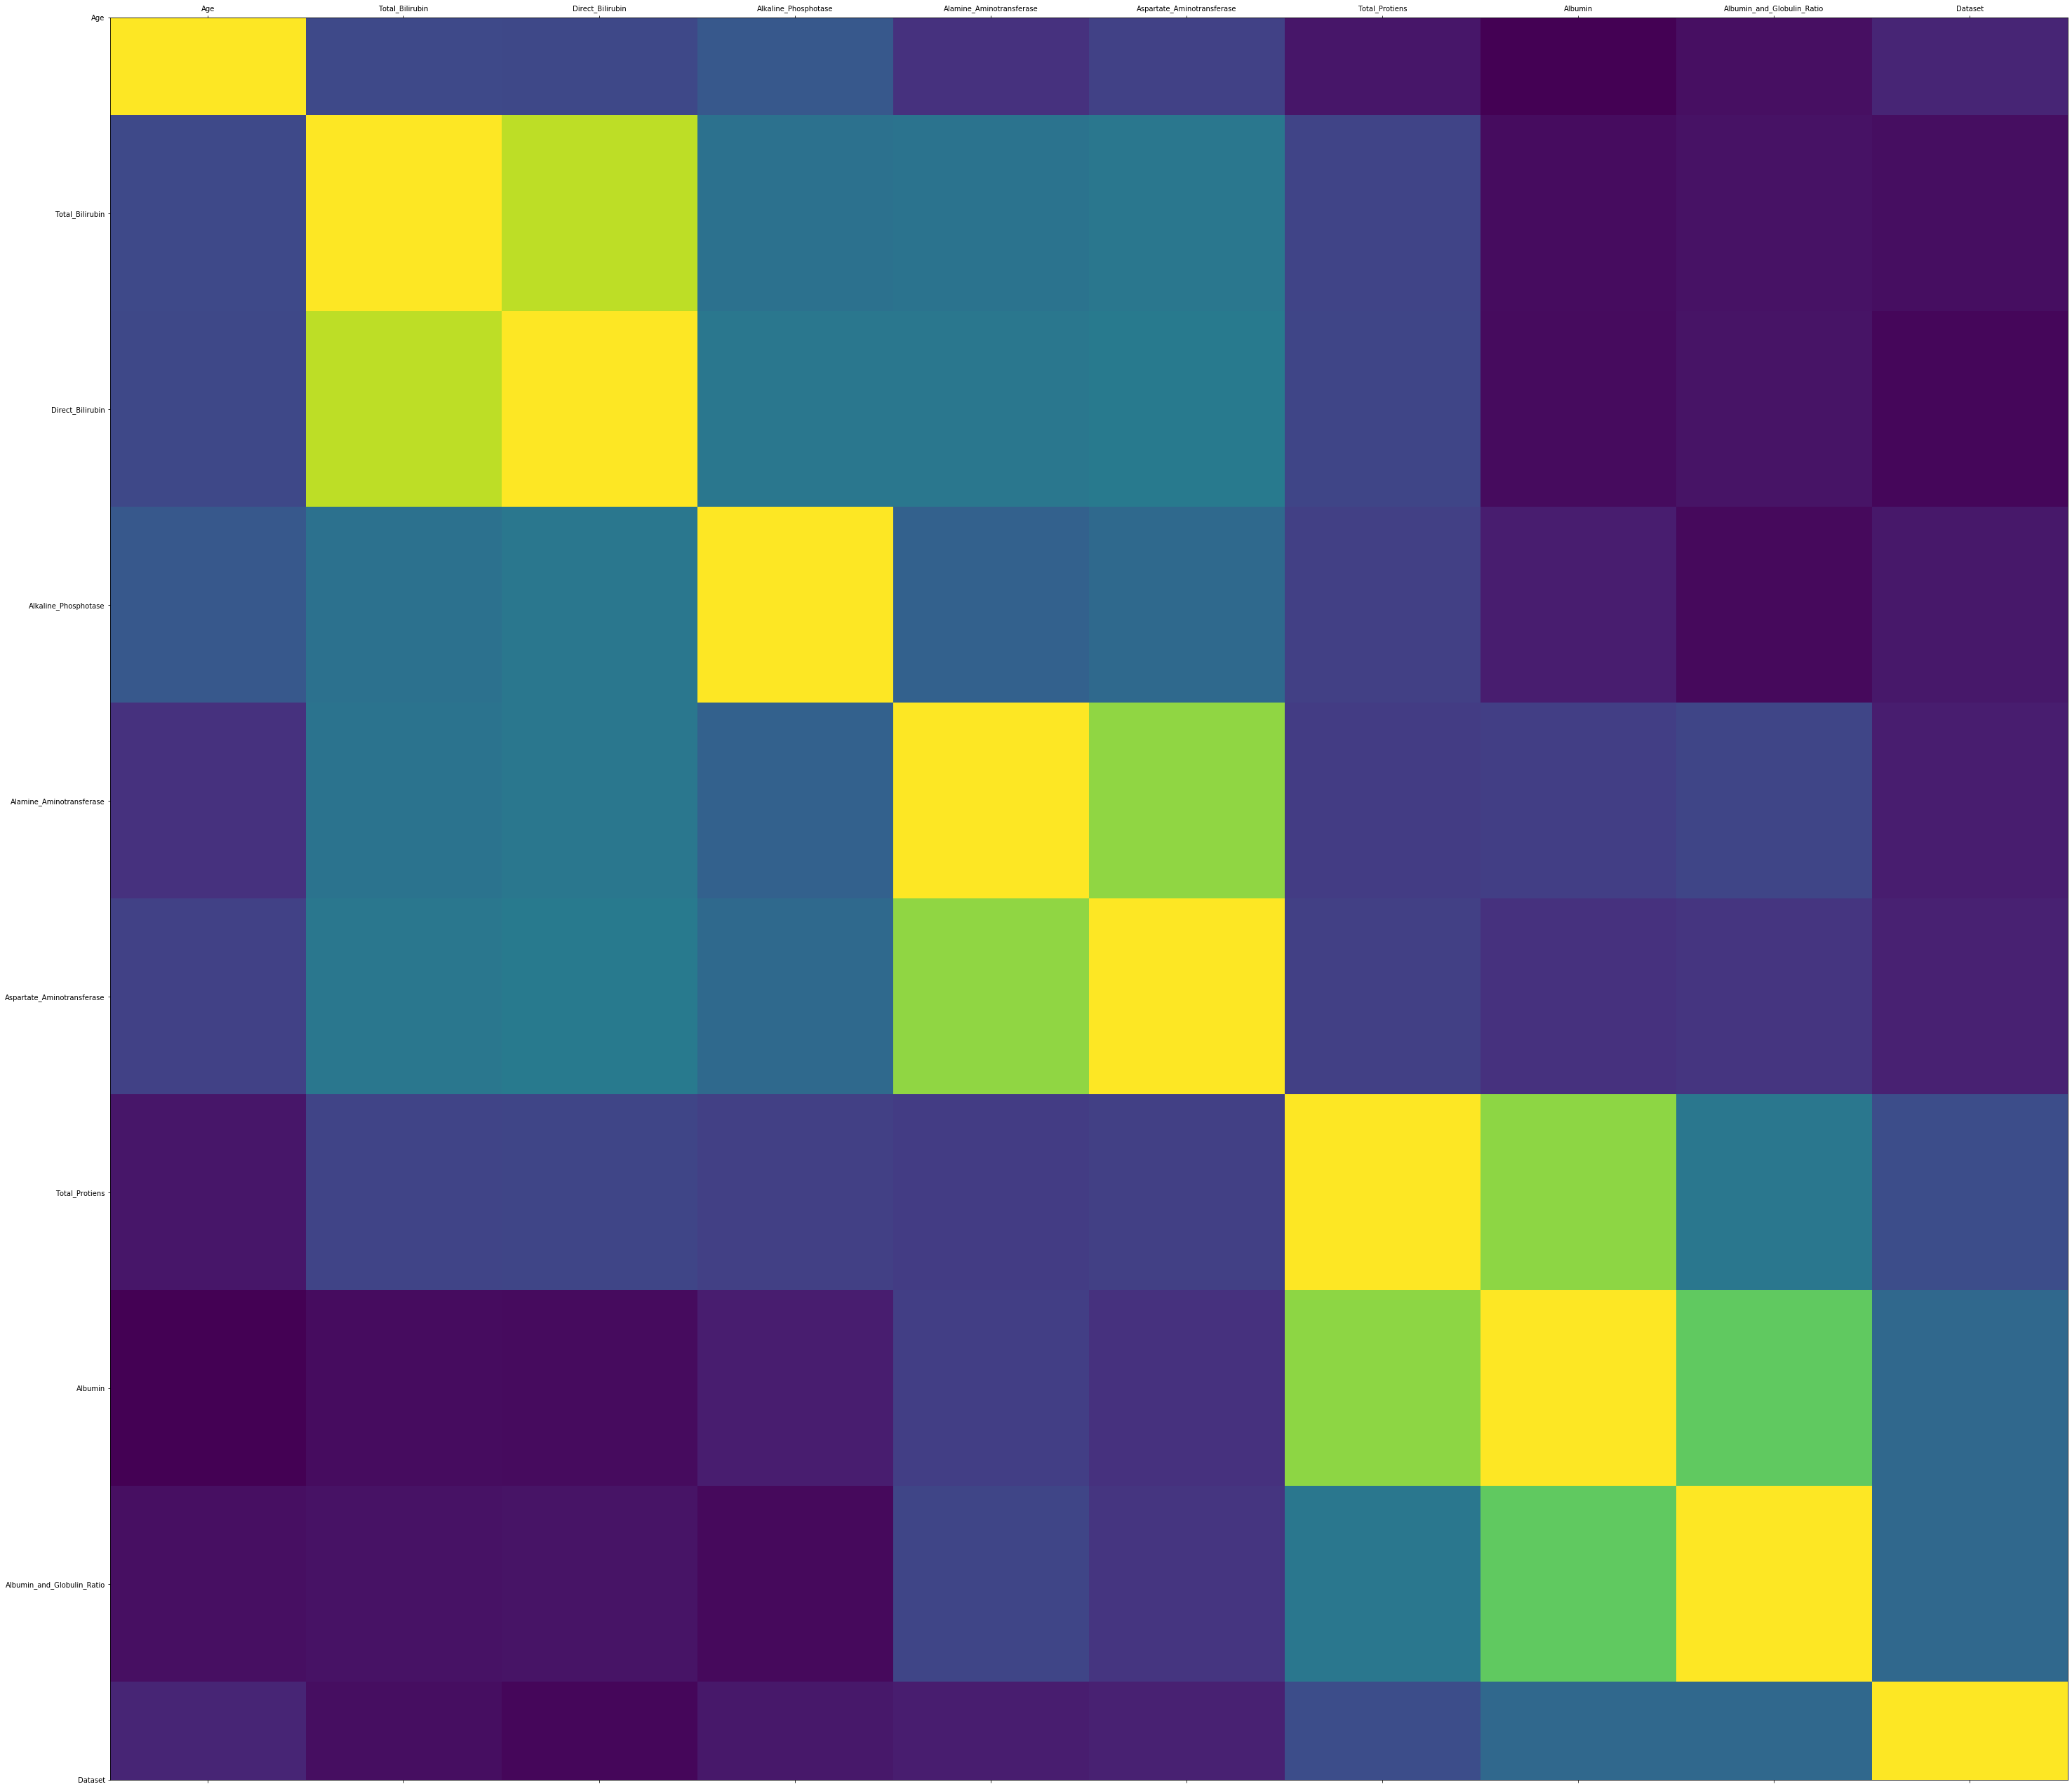

In [6]:
#Showing a Co-Relation between different Data onto our Dataframe

def plot_it(dataframe, size=50):
    corr = dataframe.corr()    # A Dataframe Co-Relation Function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # Color Codes the recangle according to their value
    plt.xticks(range(len(corr.columns)), corr.columns)  
    plt.yticks(range(len(corr.columns)), corr.columns)

plot_it(dataset)

In [7]:
#Here we will map if a person has diabetes or not based on the Outcome Parameter. 1 depicts that a person has Liver Disease
#while 2 depicts that the person has no Liver Diseases. Let's analyze the data further.

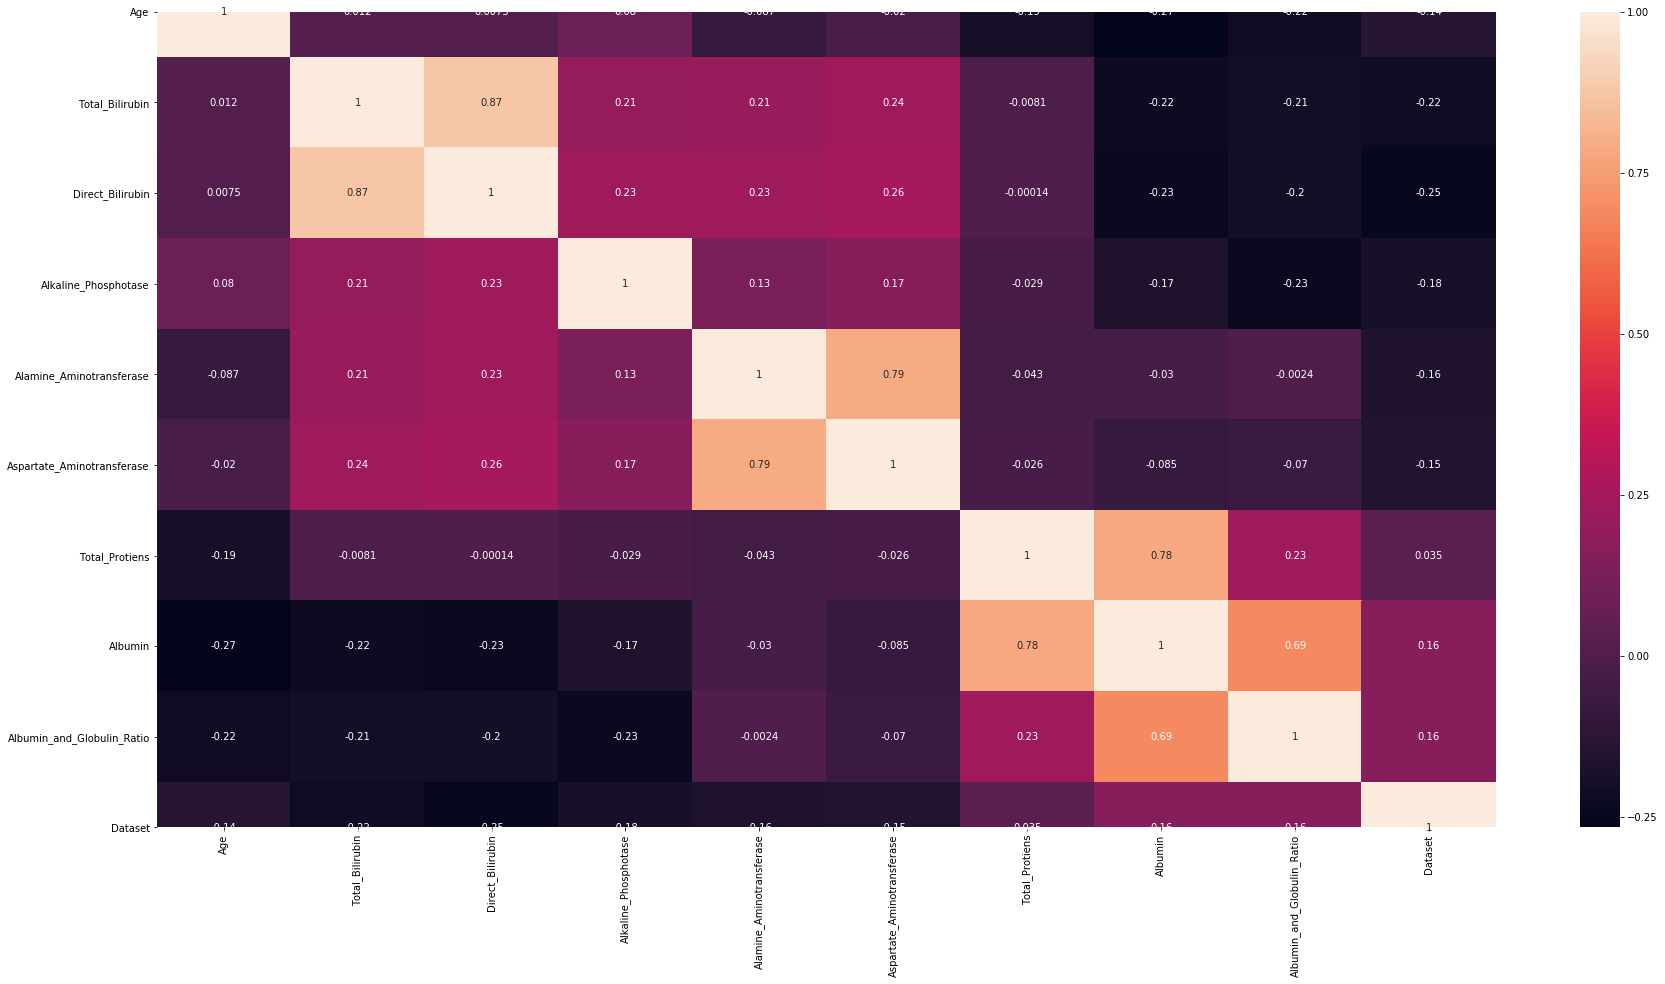

In [8]:
#Lets generate a heat-map to analyze our dataset

plt.figure(figsize=(30,15))
sns.heatmap(dataset.corr(), annot=True) 
plt.show()

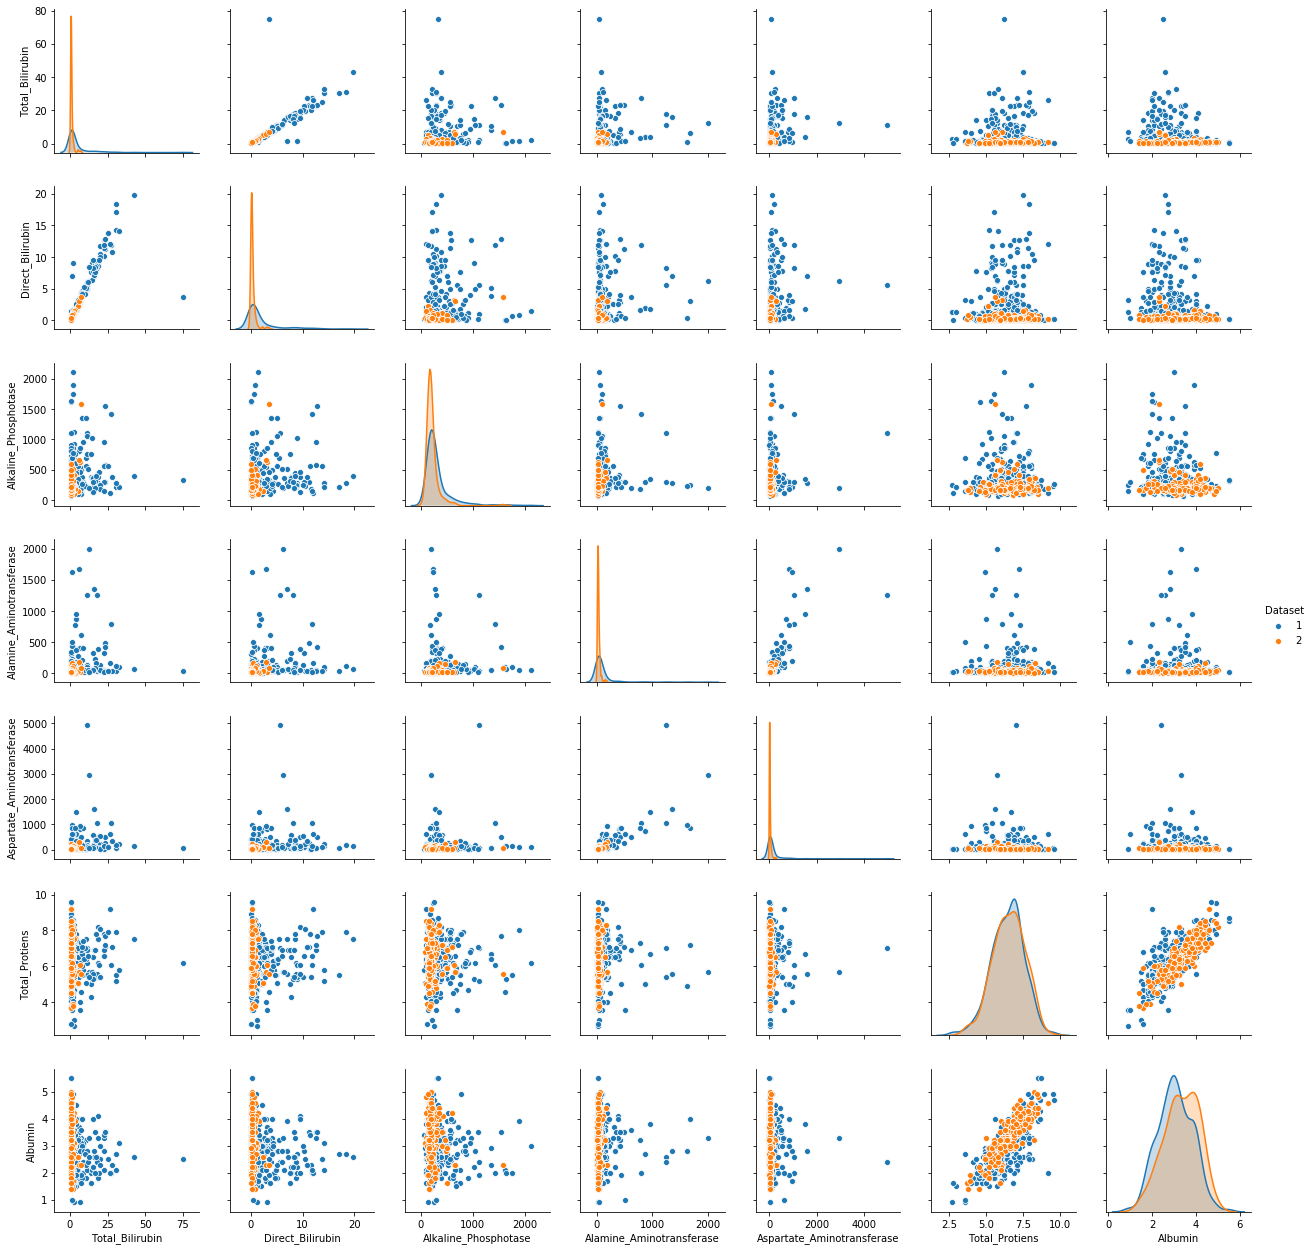

In [9]:
sns.pairplot(dataset, hue='Dataset', vars=['Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin'])
plt.show()

In [10]:
print('Columns of our Dataset: \n',dataset.columns)

Columns of our Dataset: 
 Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')


In [11]:
print('Unique Column Count: \n')
for col in dataset:
    print(len(dataset[col].unique()), col)

Unique Column Count: 

72 Age
2 Gender
113 Total_Bilirubin
80 Direct_Bilirubin
263 Alkaline_Phosphotase
152 Alamine_Aminotransferase
177 Aspartate_Aminotransferase
58 Total_Protiens
40 Albumin
70 Albumin_and_Globulin_Ratio
2 Dataset


In [12]:
dataset.shape

(583, 11)

In [13]:
dataset.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 47.9+ KB


In [15]:
#Checking if there are any NULL values in our Dataset

dataset.isnull().values.any()

True

In [16]:
#Well that's a problem. We now need to clean the Data to make it processable by Machine Learning Algorithms.
#So we will drop the rows where we have NaN values or NULL values.

In [17]:
dataset=dataset.dropna(axis = 0, how ='any') 

In [18]:
dataset.isnull().values.any()

False

In [19]:
#Much better. Lets drop off some columns which are irrelevant to us.

In [20]:
dataset=dataset.drop(['Age','Gender'], axis = 1) 

In [21]:
#We are good to go now. Lets analyze our Target Value now.

In [22]:
dataset["Dataset"].unique()

array([1, 2], dtype=int64)

1    414
2    165
Name: Dataset, dtype: int64


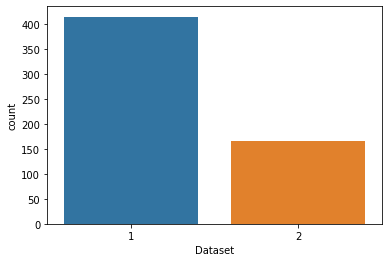

In [23]:
x=dataset["Dataset"]
sns.countplot(x)
our=dataset.Dataset.value_counts()
print(our)

So we have 414 People suffering from Liver Disease while 165 People are not suffering from any sort of Liver Disease.

In [24]:
#Lets analyze the different parameters in our Dataset with Boxplots

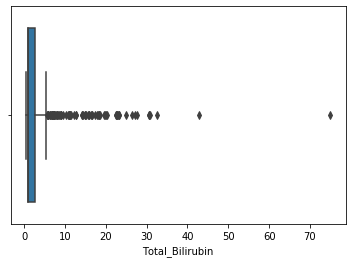

In [26]:
sns.boxplot(dataset["Total_Bilirubin"])

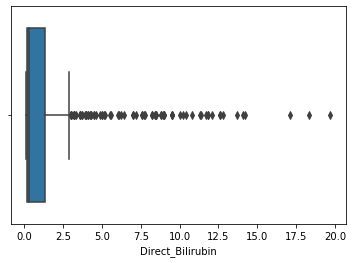

In [27]:
sns.boxplot(dataset["Direct_Bilirubin"])

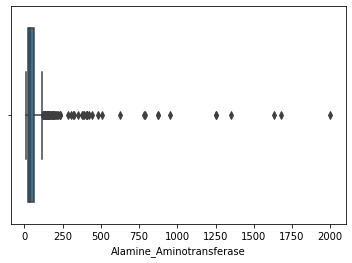

In [28]:
sns.boxplot(dataset["Alamine_Aminotransferase"])

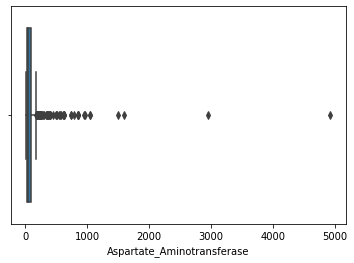

In [29]:
sns.boxplot(dataset["Aspartate_Aminotransferase"])

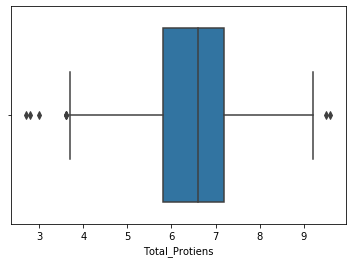

In [30]:
sns.boxplot(dataset["Total_Protiens"])

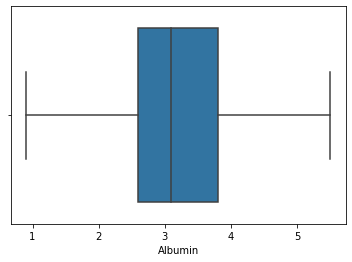

In [31]:
sns.boxplot(dataset["Albumin"])

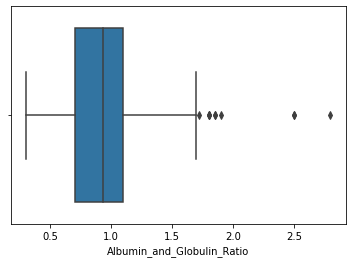

In [32]:
sns.boxplot(dataset["Albumin_and_Globulin_Ratio"])

## Data-Set Splitting

In [33]:
from sklearn.model_selection import train_test_split
to_Predict=dataset.drop("Dataset",axis=1)
to_Target=dataset["Dataset"]

In [34]:
#We will split our Dataset into two parts: 70% Data for Training while the rest 30% Data will be used for testing
X_train,X_test,Y_train,Y_test = train_test_split(to_Predict,to_Target,test_size=0.30,random_state=0)

#Hullo! Our Training and Testing Data is prepared!!

## Algorithms Used: Logistic Regression

In [35]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
logistic_regression=LogisticRegression()
logistic_regression.fit(X_train,Y_train)
predicted=logistic_regression.predict(X_test)

###########################################################

final_score=round(accuracy_score(predicted,Y_test)*100,4)
print("The accuracy of our model implemented through Logistic Regression is %r" %(final_score))

The accuracy of our model implemented through Logistic Regression is 70.1149


c:\users\my pc\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Algorithms Used: Naive Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB
gauss=GaussianNB()
gauss.fit(X_train,Y_train)
predicted=gauss.predict(X_test)

###########################################################

final_score1=round(accuracy_score(predicted,Y_test)*100,4)
print("The accuracy of our model implemented through Naive Bayes is %r" %(final_score1))

The accuracy of our model implemented through Naive Bayes is 53.4483


## Algorithms Used: Support Vector

In [37]:
from sklearn import svm
Support_Vector=svm.SVC(kernel="linear")
Support_Vector.fit(X_train,Y_train)
predicted=Support_Vector.predict(X_test)

###########################################################

final_score2=round(accuracy_score(predicted,Y_test)*100,4)
print("The accuracy of our model implemented through Support Vector Classification is %r" %(final_score2))

The accuracy of our model implemented through Support Vector Classification is 70.1149


## Final Analysis

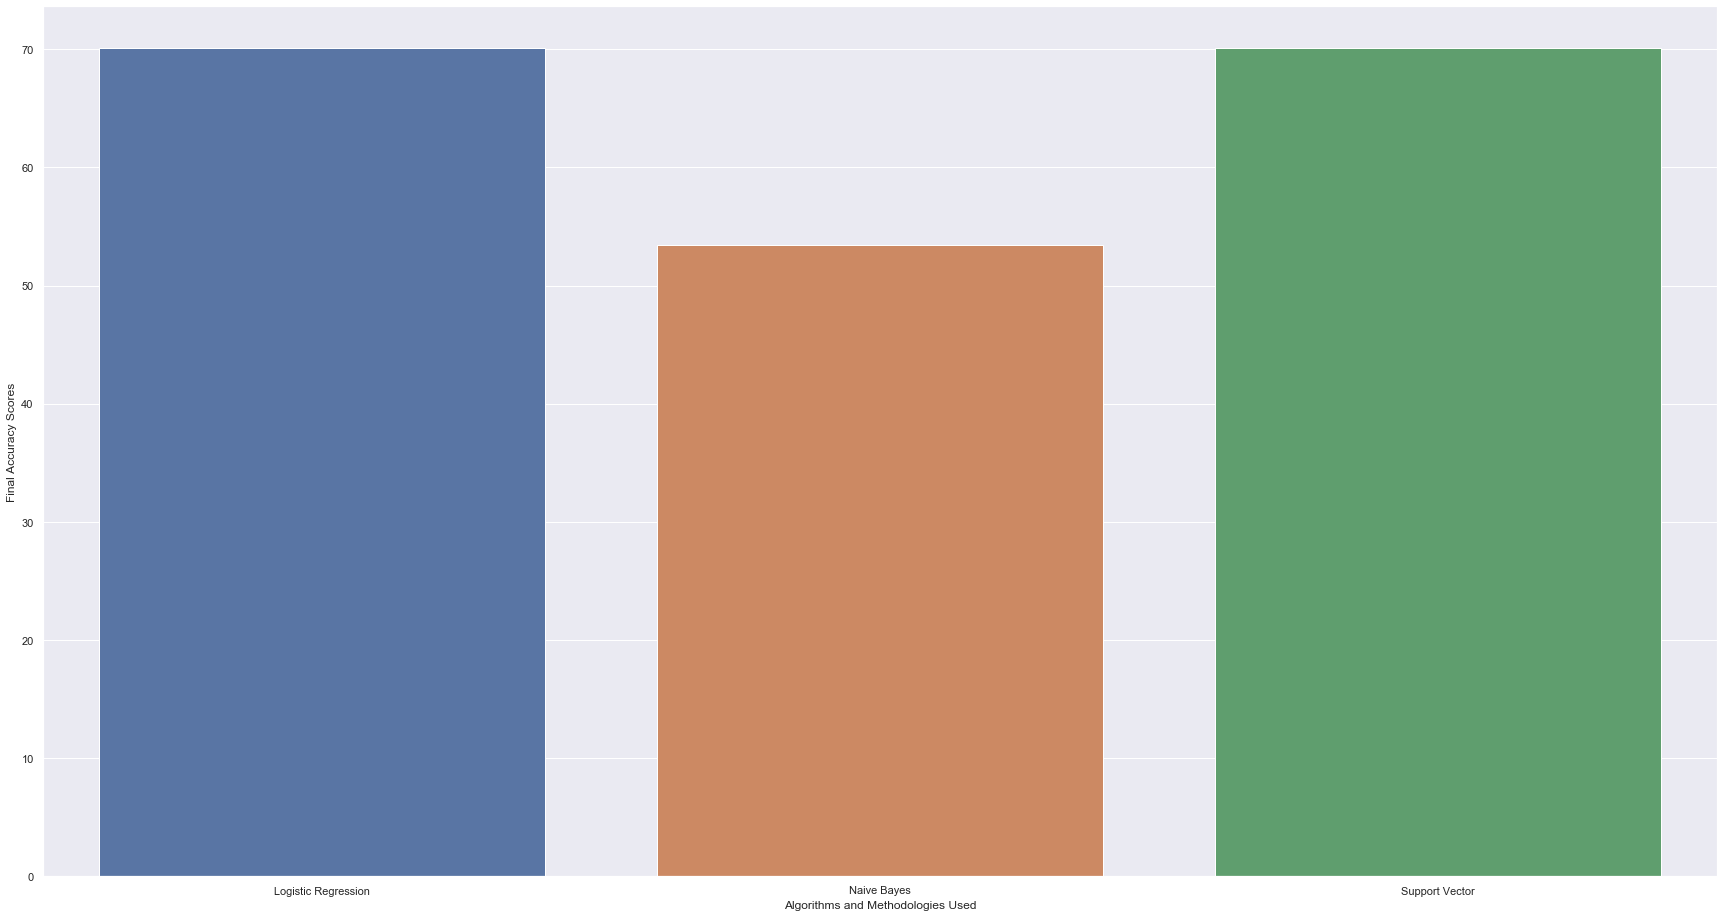

In [38]:
finale=[final_score,final_score1,final_score2]
methods=["Logistic Regression","Naive Bayes","Support Vector"]
sns.set(rc={'figure.figsize':(30,16)})
plt.xlabel("Algorithms and Methodologies Used")
plt.ylabel("Final Accuracy Scores")
sns.barplot(methods,finale)

### 70.1149% Accuracy with Logistic Regression and Support Vector. That's a good model that we have implemented! 

## Let's print the Confusion Matrix for each of our algorithms 

In [39]:
from sklearn.metrics import confusion_matrix
hinata=logistic_regression.predict(X_test)
sakura=Y_test
matrix=confusion_matrix(sakura,hinata)

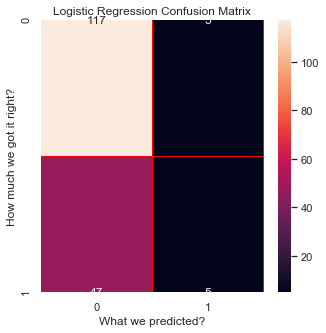

In [40]:
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(matrix,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("What we predicted?")
plt.ylabel("How much we got it right?")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

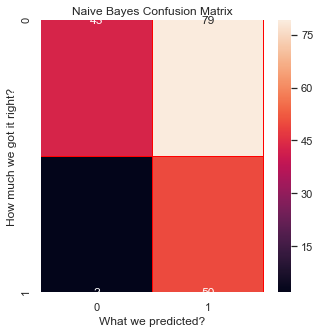

In [41]:
hinata=gauss.predict(X_test)
sakura=Y_test
matrix=confusion_matrix(sakura,hinata)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(matrix,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("What we predicted?")
plt.ylabel("How much we got it right?")
plt.title("Naive Bayes Confusion Matrix")
plt.show()

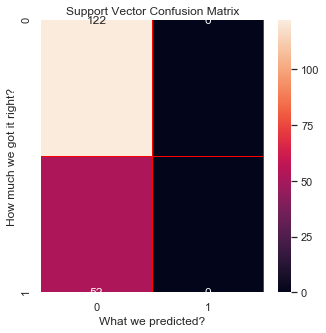

In [42]:
hinata=Support_Vector.predict(X_test)
sakura=Y_test
matrix=confusion_matrix(sakura,hinata)

f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(matrix,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("What we predicted?")
plt.ylabel("How much we got it right?")
plt.title("Support Vector Confusion Matrix")
plt.show()

## Calculating the Root-Mean Squared Error

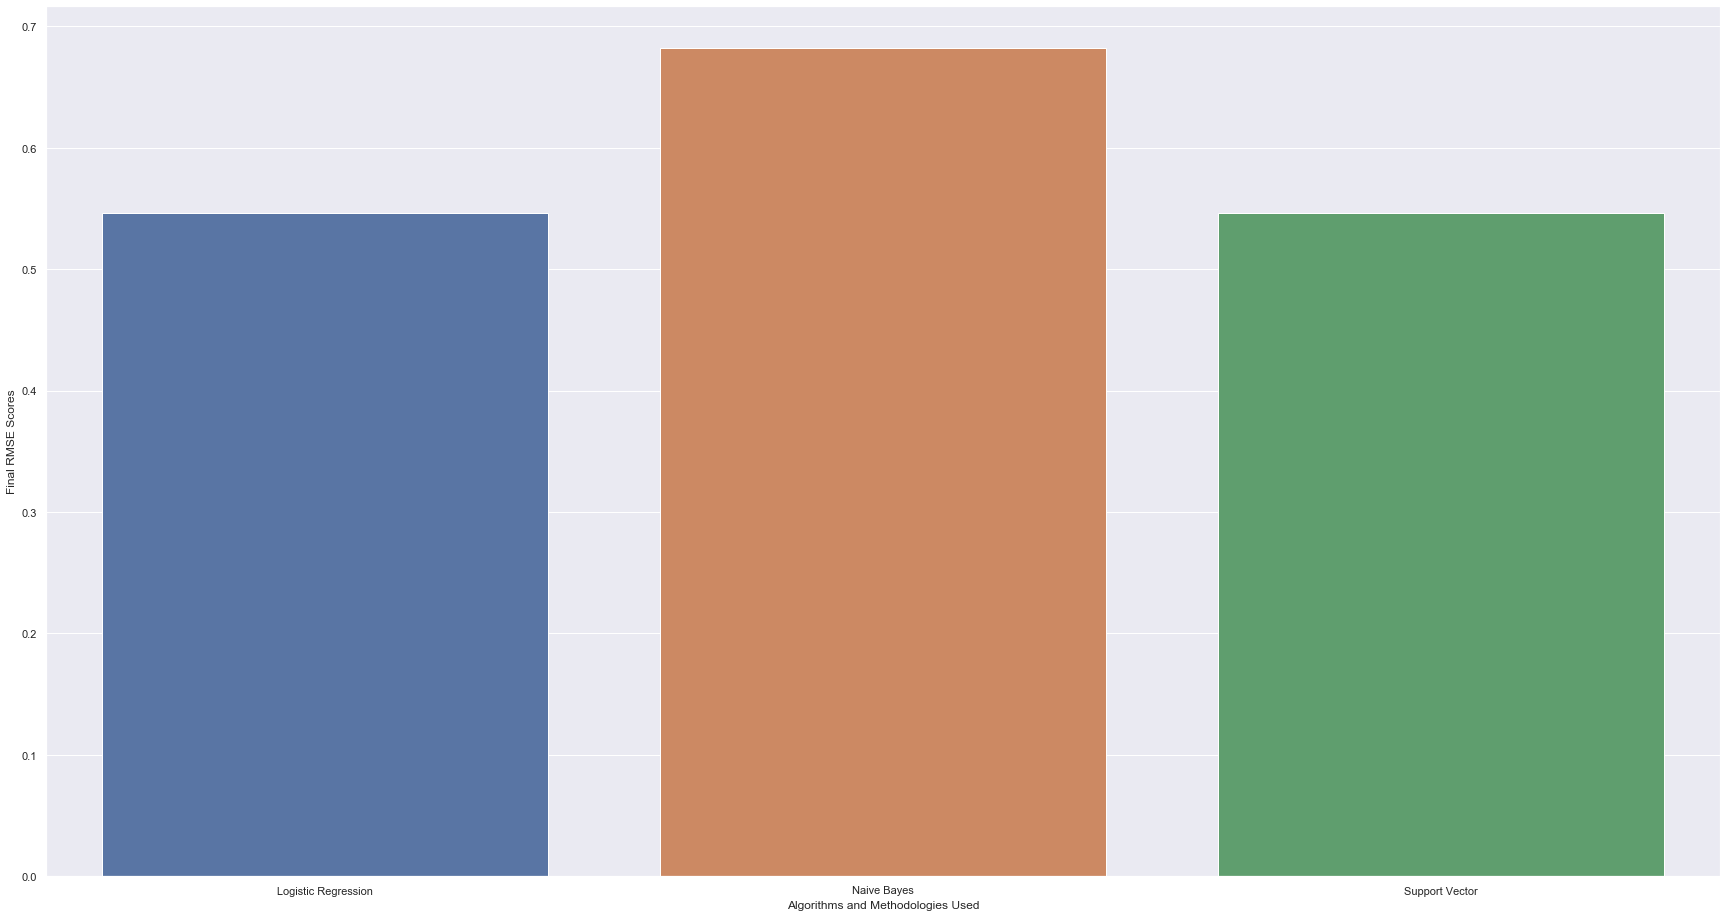

In [43]:
#Calculating Root-Mean Squared Error
from sklearn.metrics import mean_squared_error
from math import sqrt

Y_pred_lr = logistic_regression.predict(X_test)
Y_pred_rf = gauss.predict(X_test)
Y_pred_svm=Support_Vector.predict(X_test)

rmse_lr = sqrt(mean_squared_error(Y_test, Y_pred_lr))
rmse_svm= sqrt(mean_squared_error(Y_test, Y_pred_svm))
rmse_gauss = sqrt(mean_squared_error(Y_test, Y_pred_rf))

rmse_scores=[rmse_lr,rmse_gauss,rmse_svm]
sns.set(rc={'figure.figsize':(30,16)})
plt.xlabel("Algorithms and Methodologies Used")
plt.ylabel("Final RMSE Scores")
sns.barplot(methods,rmse_scores)